## **Seguros medicos**
Regressão Linear com Deep Learning

### **Importação das bibliotecas e carregamento dos dados**

In [17]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

plt.style.use('dark_background')
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/diogomonteiro/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Análise Exploratória Geral**

**Nessa parte vamos análisar:** 

1 - Análisar todas as variáveis para entender os dados.

2 - Análisar as quantidade linhas, colunas, tipos das colunas, dados nulos, quartis e etc...

Função para análisar as colunas

___________________________________________________________
age
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
___________________________________________________________


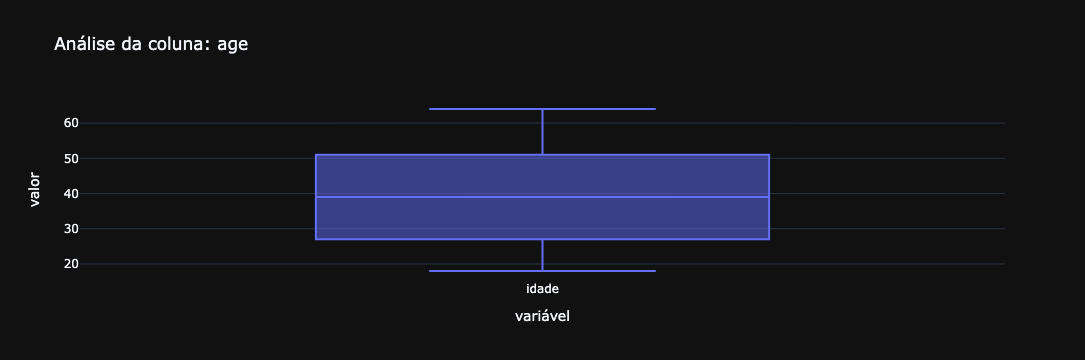


___________________________________________________________
sex
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


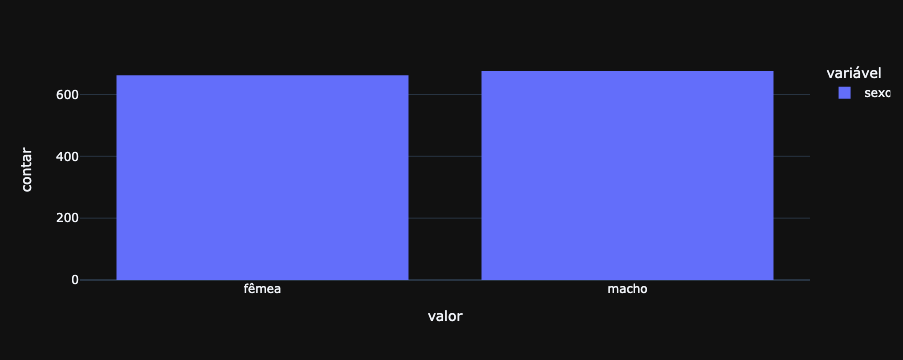


___________________________________________________________
bmi
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 548
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
___________________________________________________________


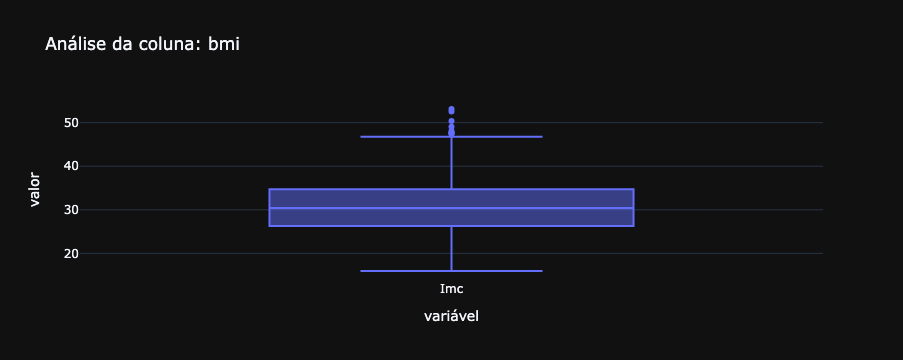


___________________________________________________________
children
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
___________________________________________________________


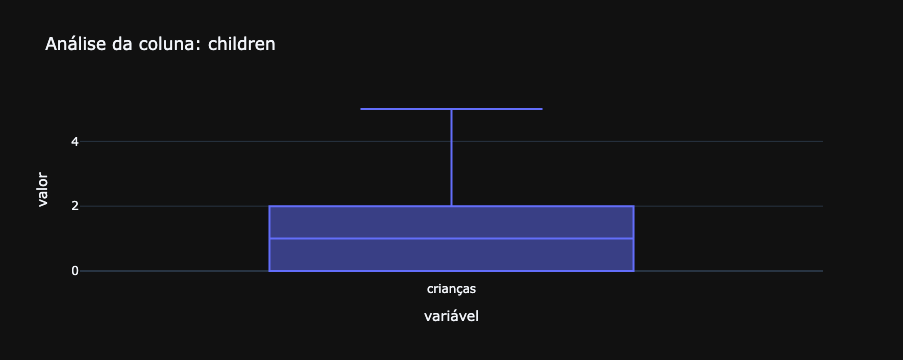


___________________________________________________________
smoker
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


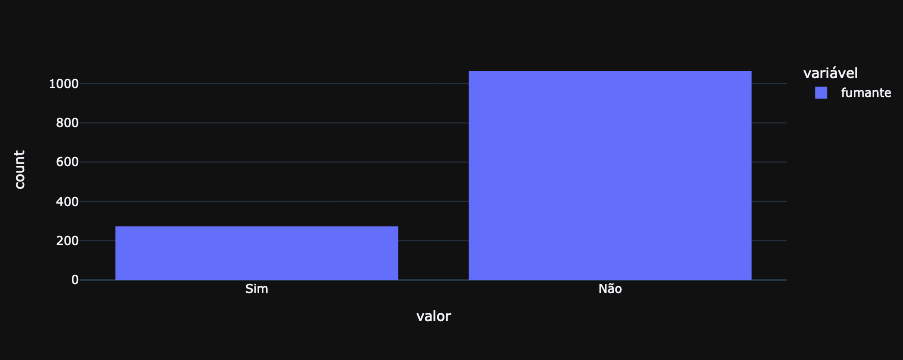


___________________________________________________________
region
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 4
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


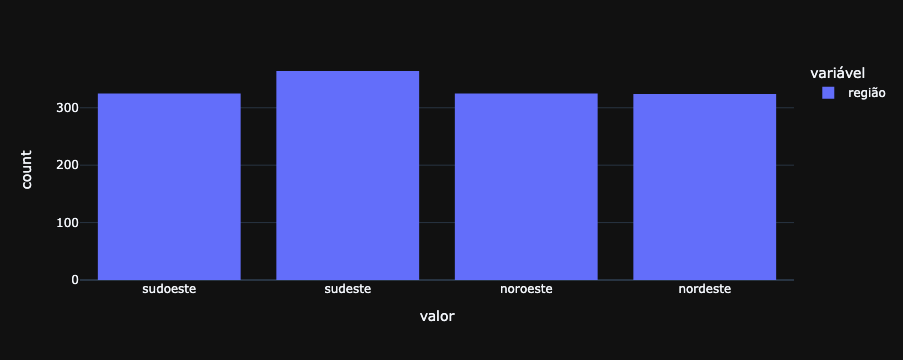


___________________________________________________________
charges
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 1337
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
___________________________________________________________


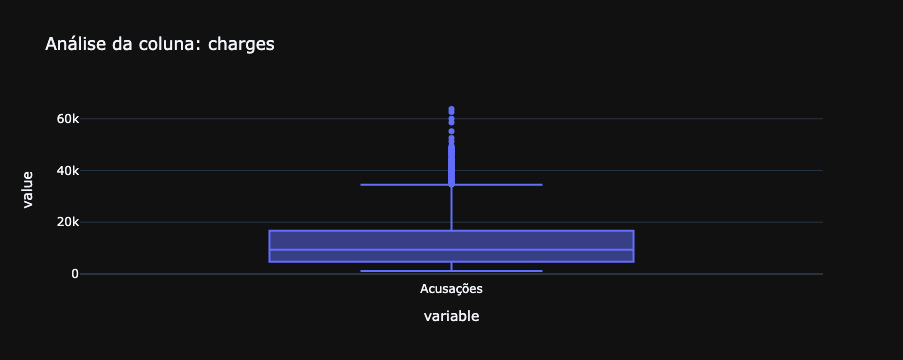

In [96]:
def analise(df):
    
    for i in df.columns: 
        
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64': 

            print(f'___________________________________________________________')
            print(f'{df[i].name}')
            print(f'-----------------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print(f'-----------------------------------------------------------')
            print(f'Dados unicos: {df[i].nunique()}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de dados nulos: {df[i].isnull().sum()}')
            print(f'___________________________________________________________')
            print(f'Análsando os quartis: \n\n{df[i].describe()}')
            print(f'___________________________________________________________')
            fig = px.box(df[i], title=f"Análise da coluna: {df[i].name}",template= "plotly_dark")
            fig.show()
            print('')

        else:
            print(f'___________________________________________________________')
            print(f'{df[i].name}')
            print(f'-----------------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print(f'-----------------------------------------------------------')
            print(f'Dados unicos: {df[i].nunique()}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de dados nulos: {df[i].isnull().sum()}')
            print(f'___________________________________________________________')
            fig1 = px.histogram(df[i],template= 'plotly_dark')
            fig1.show()
            print('')

analise(df)   

### **Resposta:**
Conseguimos ver, que não tem dados nulos e alguns outliers que estão dentro do padrão, então não vamos tirar esse dados.

Precisamos fazer algumas transformações nos dados categóricos para numéricos.

-------

### **Transformando os dados categóricos em numéricos** 

**Nesta parte vamos fazer:**

1 - Usar get_dummies para criar novas colunas das variáveis categóricas.

2 - Transformar as novas colunas em numéricas.

### **Separando os dados de treino e teste**

**Nesta parte vamos fazer:**

1 - importar a biblioteca sklearn para separar os dados de treino e teste.

2 - Usar Sklearn StandardScaler para fazer padronização.

### **Criando os modelos de redes neurais para Regressão Linear**

**Nesta parte vamos fazer:** 

1 - Criar uma classe para os modelos.

2 - treinar, testar e  fazer validação cruzada dos modelos.
 